In [8]:
import open3d as o3d
# read pointcloud.ply file
pcd = o3d.io.read_point_cloud("pointcloud.ply")
points = pcd.points
# generate grid map from point cloud
grid_map = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, voxel_size=0.1)
# generate 2d grid map from point cloud


AttributeError: type object 'open3d.cuda.pybind.geometry.VoxelGrid' has no attribute 'create_from_point_cloud_with_grid_index'

In [7]:
grid_map

VoxelGrid with 2018511 voxels.

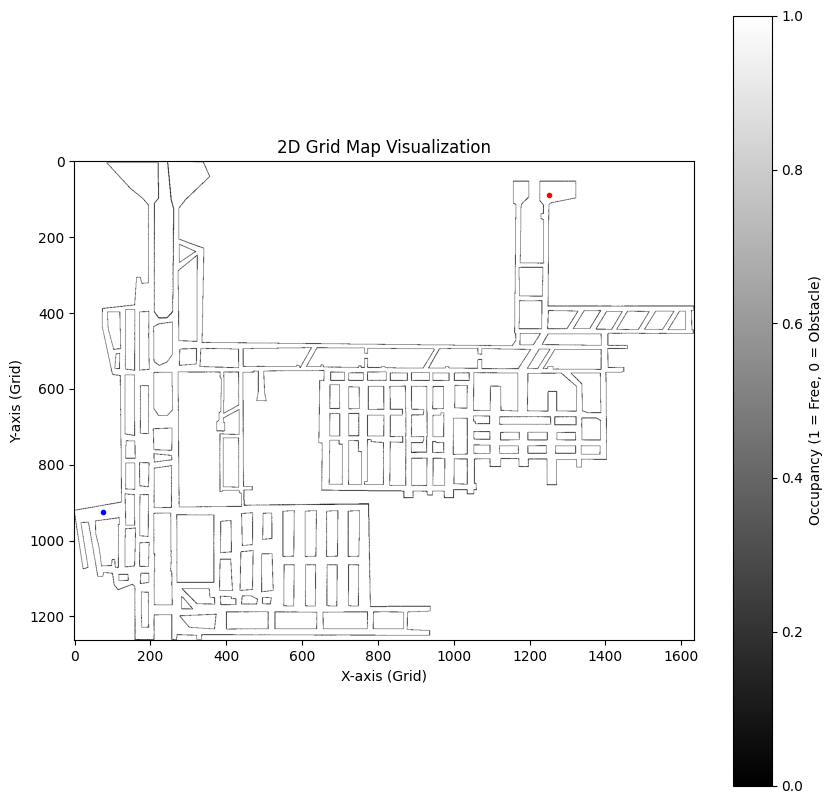

In [23]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

def generate_2d_grid_map(point_cloud, grid_size, obstacle_threshold=0.2):
    # Get the point cloud data as a numpy array
    points = np.asarray(point_cloud.points)
    
    # Determine the bounds of the point cloud data
    min_x, min_y = np.min(points[:, :2], axis=0)
    max_x, max_y = np.max(points[:, :2], axis=0)

    # Calculate the number of grid cells along each axis
    grid_width = int((max_x - min_x) / grid_size) + 1
    grid_height = int((max_y - min_y) / grid_size) + 1

    # Initialize the grid map with all cells set to 1 (free space)
    grid_map = np.zeros((grid_height, grid_width), dtype=np.float32)
    
    # Convert points to grid indices
    for x, y, z in points:
        i = int((y - min_y) / grid_size)
        j = int((x - min_x) / grid_size)
        
        # Mark cell as obstacle if any point in cell has z > threshold
        if z > obstacle_threshold:
            grid_map[i, j] = 0.0  # obstacle cell
        else:
            grid_map[i, j] = 1.0
    return grid_map


# Load point cloud
point_cloud = o3d.io.read_point_cloud("pointcloud.ply")

# Generate 2D grid map
grid_map = generate_2d_grid_map(point_cloud, grid_size=0.2)  # Adjust grid size as needed

# Visualize the grid map
visualize_grid_map(grid_map.T)


In [15]:
np.save("grid_map.npy", grid_map.T)

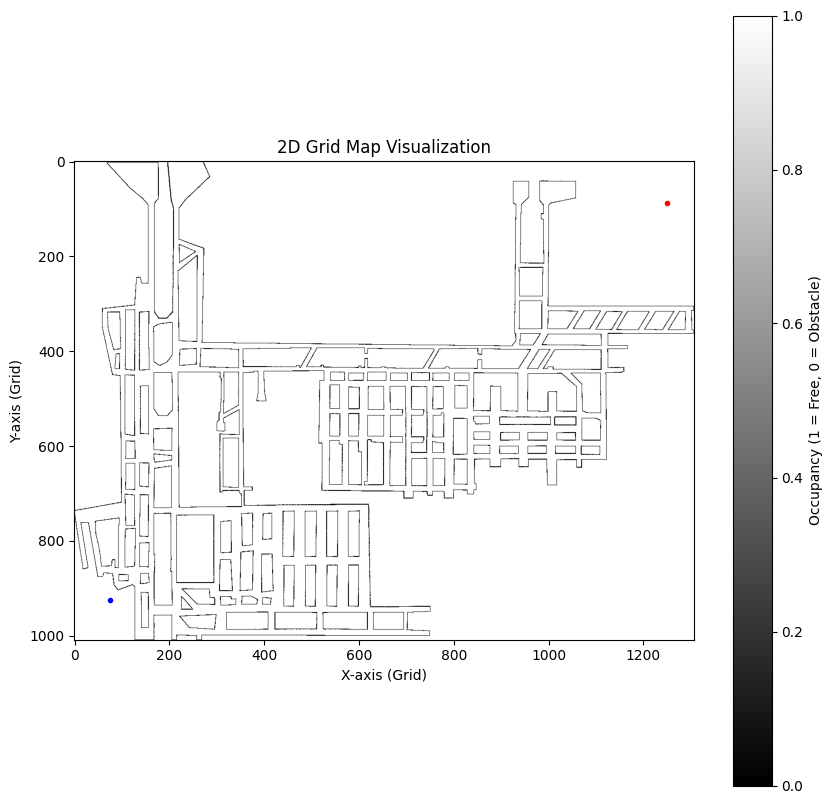

In [22]:
def visualize_grid_map(grid_map):
    plt.figure(figsize=(10, 10))
    plt.imshow(grid_map,"gray")
    plt.colorbar(label="Occupancy (1 = Free, 0 = Obstacle)")
    plt.xlabel("X-axis (Grid)")
    plt.ylabel("Y-axis (Grid)")
    plt.title("2D Grid Map Visualization")
    plt.scatter(500*2.5, 35*2.5, color="red", marker=".", label="Points")
    plt.scatter(30*2.5, 370*2.5, color="blue", marker=".", label="Points")
    plt.show()
visualize_grid_map(grid_map.T)